# Illustrations of the Distribution class
Author: Michael D. Shields
Date: 8/16/18, last modified on 12/10/18 by Audrey Olivier, last modified on 3/6/2019 by Dimitris Giovanis

This examples shows the use of the Distribution class. In particular:
- how to define and use one of the univariate distributions supported by UQpy,
- how to define a custom distribution,
- how to define a multivariate distribution by 1) giving a list of independent marginals or 2) giving a list of marginals and a copula to model the dependence structure.

Import the necessary modules. Note that the user only needs to make use of the Distribution class of the Distributions module.

In [2]:
from UQpy.Distributions import Distribution
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Illustrates the Distribution class of UQpy for a lognormal distribution (supported univariate)
Define a univariate lognormal distribution, call its methods to compute its pdf, cdf, icdf, moments and samples random variables.

In [4]:
dist = Distribution(dist_name='lognormal')
print(dist.dist_name)

lognormal


Plot the pdf of the distribution. 
Notice that when calling the pdf or log_pdf methods, the parameters of the distribution must be specified.

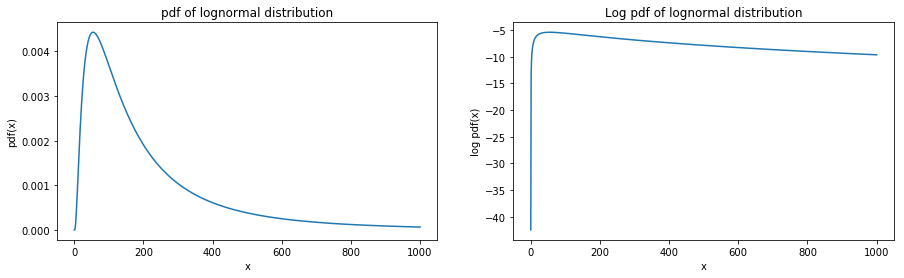

In [5]:
x = np.linspace(0.01,1000,1000)
fig, ax = plt.subplots(ncols=2, figsize = (15,4))
ax[0].plot(x, dist.pdf(x, params=[1,0,np.exp(5)]))
ax[0].set_xlabel('x')
ax[0].set_ylabel('pdf(x)')
ax[0].set_title('pdf of lognormal distribution')

ax[1].plot(x, dist.log_pdf(x, params=[1,0,np.exp(5)]))
ax[1].set_xlabel('x')
ax[1].set_ylabel('log pdf(x)')
ax[1].set_title('Log pdf of lognormal distribution')
plt.show()

Print the mean, standard deviation, skewness, and kurtosis of the distribution.
Notice that when calling the moments method of the distribution, the paramaters must be specified.

In [6]:
moments_list = ['mean', 'variance', 'skewness', 'kurtosis']
moments = dist.moments(params=[1,0,np.exp(5)])
for i, moment in enumerate(moments_list):
    print(moment+' = {0:.2f}'.format(moments[i]))

mean = 244.69
variance = 102880.65
skewness = 6.18
kurtosis = 110.94


Generate 5000 random samples from the lognormal distribution.
Notice that when calling the rvs method, both the parameters and the number of samples must be specified.

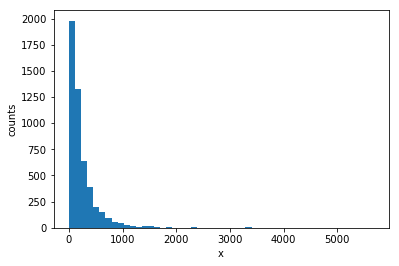

In [7]:
y = dist.rvs(params=[1,0,np.exp(5)], nsamples=5000)
plt.hist(y, bins=50)
plt.xlabel('x')
plt.ylabel('counts')
plt.show()

Estimate the parameters of the lognormal distribution based on the samples generated above. Notice that the fit method returns three parameters (s, loc, and scale) that correspond to the scipy.stats parameters for the distribution. In this example, data y was generated with parameters (1, 0, exp(5)=148), fit should return these values.

In [8]:
print(dist.fit(y))

(4.446938821572064, 1.6301667617790789, 4.3908309912074515)


## Example with a custom distribution

File rosenbrock.py defines a bivariate Rosenbrock distribution. Note that the name input of Distribution should be the name of the file without the .py extension.

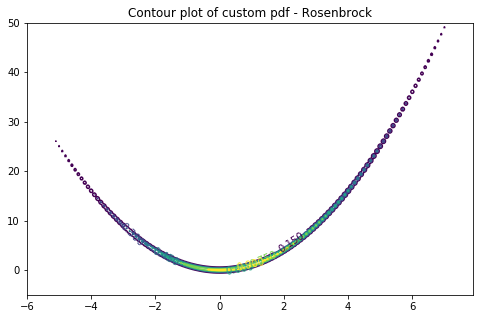

In [10]:
dist = Distribution(dist_name='rosenbrock')
params_dist = [20]

fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(-6, 8, 0.1)
y = np.arange(-5, 50, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1), params=params_dist)
CS = ax.contour(X, Y, Z.reshape(X.shape))
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot of custom pdf - Rosenbrock')
plt.show()

Try a call at the fit method using dummy data. UQpy returns an Attribute error as the fit method is not defined in the rosenbrock.py file. Fit can be performed by maxizing the likelihood, see Inference module.

Same for the rvs method; random samples can be generated using importance sampling or MCMC, see SampleMethods module.

In [11]:
y = np.zeros((100,2))
try:
    dist.fit(y)
except AttributeError:
    print('Method fit not defined.')
try:
    dist.rvs(params=params_dist)
except AttributeError:
    print('Method rvs not defined.')

Method fit not defined.
Method rvs not defined.


## Example of a multivariate distribution provided with independent marginals

Create a bivariate distribution as a product of two independent univariate distributions: a normal and a lognormal. Then draw some random samples (left plot below) and plot the pdf (right contour plot).

In [14]:
dist = Distribution(dist_name=['normal', 'lognormal'])
print(dist.dist_name)
params_dist = [[2,2],[1,0,np.exp(5)]]

['normal', 'lognormal']


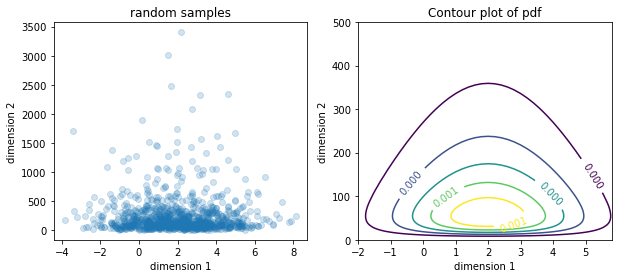

In [15]:
y = dist.rvs(params=params_dist, nsamples=1000)
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].scatter(y[:,0], y[:,1], alpha=0.2)
ax[0].set_xlabel('dimension 1')
ax[0].set_ylabel('dimension 2')
ax[0].set_title('random samples')

x = np.arange(-2.0, 6.0, 0.2)
y = np.arange(0.01, 500, 1)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1), params=params_dist)
CS = ax[1].contour(X, Y, Z.reshape(X.shape))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_xlabel('dimension 1')
ax[1].set_ylabel('dimension 2')
ax[1].set_title('Contour plot of pdf')
plt.show()

## Example of a multivariate distribution provided with marginals and copula

In [17]:
# dist_1 is a multivariate normal with independent marginals
dist_1 = Distribution(dist_name=['normal', 'normal'])

# dist_2 exhibits dependence between the two dimensions, defined using a gumbel copula
dist_2 = Distribution(dist_name=['normal', 'normal'], copula='gumbel')

params_dist = [[0, 1], [0, 1]]
params_copula = 2

Compare pdfs for dist_1 and dist_2.

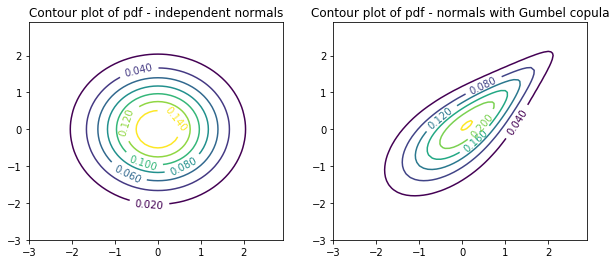

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.pdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1), params=params_dist)
CS = ax[0].contour(X, Y, Z.reshape(X.shape))
ax[0].clabel(CS, inline=1, fontsize=10)
ax[0].set_title('Contour plot of pdf - independent normals')

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_2.pdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1), params=params_dist,
              copula_params = params_copula)
CS = ax[1].contour(X, Y, Z.reshape(X.shape))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_title('Contour plot of pdf - normals with Gumbel copula')
plt.show()

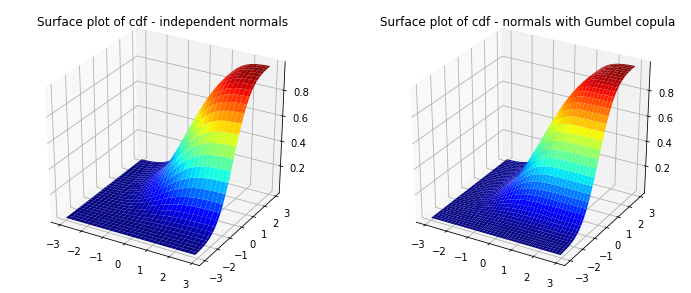

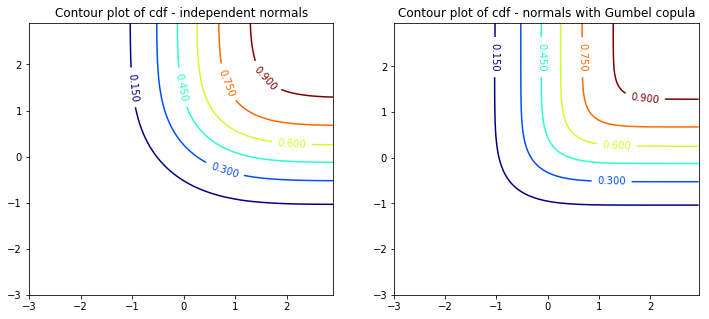

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121, projection='3d')
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1), params=params_dist)
CS = ax.plot_surface(X, Y, Z.reshape(X.shape), cmap='jet')
ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Surface plot of cdf - independent normals')

ax = fig.add_subplot(122, projection='3d')
x = np.arange(-3, 3, 0.05)
y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)
Z = dist_2.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1), params=params_dist,
              copula_params = params_copula)
CS = ax.plot_surface(X, Y, Z.reshape(X.shape), cmap='jet')
ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Surface plot of cdf - normals with Gumbel copula')
plt.show()

# contour plots
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1), params=params_dist)
CS = ax.contour(X, Y, Z.reshape(X.shape), cmap='jet')
ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Contour plot of cdf - independent normals')

ax = fig.add_subplot(122)
x = np.arange(-3, 3, 0.05)
y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)
Z = dist_2.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1), params=params_dist,
              copula_params = params_copula)
CS = ax.contour(X, Y, Z.reshape(X.shape), cmap='jet')
ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Contour plot of cdf - normals with Gumbel copula')
plt.show()